# **In this example we wish to make forcasts on a time series of international airline passengers**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine_Learning/LSTM_practice/international-airline-passengers.csv", 
                      usecols = [1], 
                      engine = "python", 
                      skipfooter = 3)


In [3]:
print(data.shape)
print(type(data))

(144, 1)
<class 'pandas.core.frame.DataFrame'>


In [4]:
print(data)

     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                  112                             
1                                                  118                             
2                                                  132                             
3                                                  129                             
4                                                  121                             
..                                                 ...                             
139                                                606                             
140                                                508                             
141                                                461                             
142                                                390                             
143                                                432                      

In [5]:
data.head()


,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


# **In this example I use time series data internation airline passengers,which wish to make forcasts on a time series of international airline passengers**

# **plot the data time series digram to observe trends**

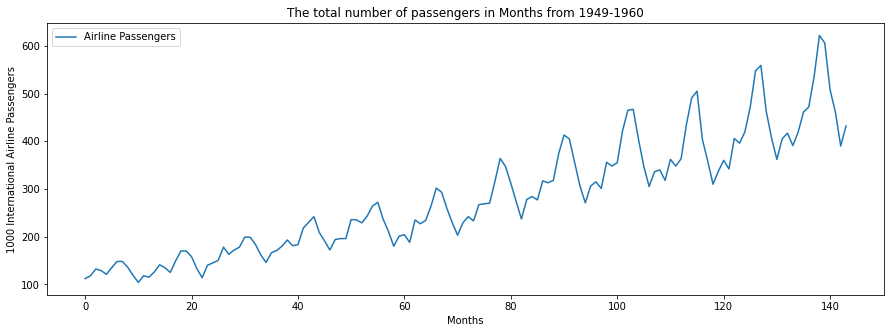

In [6]:
plt.figure(figsize = (15, 5))
plt.plot(data, label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("The total number of passengers in Months from 1949-1960")
plt.legend()
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras import metrics

Using TensorFlow backend.


# **Data processing of international airlines passengers**

### **Get the raw data valuse from the pandas data frame**

In [0]:
data_raw = data.values.astype("float32")

In [9]:
print(data_raw.shape)
print(type(data_raw))
print(data_raw)


(144, 1)
<class 'numpy.ndarray'>
[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]
 [104.]
 [118.]
 [115.]
 [126.]
 [141.]
 [135.]
 [125.]
 [149.]
 [170.]
 [170.]
 [158.]
 [133.]
 [114.]
 [140.]
 [145.]
 [150.]
 [178.]
 [163.]
 [172.]
 [178.]
 [199.]
 [199.]
 [184.]
 [162.]
 [146.]
 [166.]
 [171.]
 [180.]
 [193.]
 [181.]
 [183.]
 [218.]
 [230.]
 [242.]
 [209.]
 [191.]
 [172.]
 [194.]
 [196.]
 [196.]
 [236.]
 [235.]
 [229.]
 [243.]
 [264.]
 [272.]
 [237.]
 [211.]
 [180.]
 [201.]
 [204.]
 [188.]
 [235.]
 [227.]
 [234.]
 [264.]
 [302.]
 [293.]
 [259.]
 [229.]
 [203.]
 [229.]
 [242.]
 [233.]
 [267.]
 [269.]
 [270.]
 [315.]
 [364.]
 [347.]
 [312.]
 [274.]
 [237.]
 [278.]
 [284.]
 [277.]
 [317.]
 [313.]
 [318.]
 [374.]
 [413.]
 [405.]
 [355.]
 [306.]
 [271.]
 [306.]
 [315.]
 [301.]
 [356.]
 [348.]
 [355.]
 [422.]
 [465.]
 [467.]
 [404.]
 [347.]
 [305.]
 [336.]
 [340.]
 [318.]
 [362.]
 [348.]
 [363.]
 [435.]
 [491.]
 [505.]
 [404.]
 [359.]
 [310.]
 [337.]
 [360.]

### **Normalize the data let them in the range (0,1)**

In [0]:
data_scaler = MinMaxScaler(feature_range = (0,1))

In [11]:
print(type(data_scaler))
print(data_scaler)

<class 'sklearn.preprocessing._data.MinMaxScaler'>
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
dataset = data_scaler.fit_transform(data_raw)

In [13]:
print(dataset[0:5])

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]


### **Split training data and testing data**

In [0]:
training_weight = 0.60
testing_weight = 0.40
train_size = int(len(dataset) * training_weight)
test_size = int(len(dataset) * testing_weight)

In [0]:
train_data = dataset[0:train_size,:]
test_data = dataset[train_size:len(dataset),:]

In [16]:
print(train_data.shape)
print(test_data.shape)

(86, 1)
(58, 1)


In [17]:
print('Number of training sample:',len(train_data))
print('Number of testing sample:',len(test_data))

Number of training sample: 86
Number of testing sample: 58


### **Reshape train_data and test_data**

In [0]:
train_X = np.reshape(train_data, (train_data.shape[0], 1, train_data.shape[1]))
test_X = np.reshape(test_data,(test_data.shape[0],1,test_data.shape[1]))

**Original train_data and test_data shape**

In [19]:
print(train_data.shape)
print(test_data.shape)

(86, 1)
(58, 1)


**New train_data and test_data shape**

In [20]:
print(train_X.shape)
print(test_X.shape)

(86, 1, 1)
(58, 1, 1)


**Another method defien train data and test data as well as define train_y and test_y**

**define create_dataset method aimming to get train_x train_y and test_x test_y**

In [0]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))


In [0]:
window_size = 1
train_X, train_Y = create_dataset(train_data, window_size)
test_X, test_Y = create_dataset(test_data, window_size)

In [23]:
print(train_X.shape)
print(train_Y.shape)
print('==================')
print(test_X.shape)
print(test_Y.shape)
print('==================')

(84, 1)
(84,)
(56, 1)
(56,)


**Reshape to appropriate size form for Keras**

In [24]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)
print(test_X.shape)
print('==========')
print(train_Y.shape)
print(test_Y.shape)

New training data shape:
(84, 1, 1)
(56, 1, 1)
(84,)
(56,)


# **Define LSTM model**

In [25]:
model = Sequential()
model.add(LSTM(128,input_shape = (1,1)))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Dropout(0.5))
model.add(Dense(16,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.add(Activation("linear"))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  import sys


**compile LSTM model**

In [26]:
model.compile(loss = "mean_squared_error", 
              optimizer = "adam",metrics=[metrics.mae])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)               

In [0]:
# # Define the model.
# model = Sequential()
# model.add(LSTM(128,input_shape = (1, window_size)))
# model.add(Dropout(0.5))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation("linear"))
# model.compile(loss = "mean_squared_error", 
#               optimizer = "adam")
# model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


**Train this LSTM model**

In [27]:
history = model.fit(train_X, 
              train_Y, validation_split=0.2,
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 67 samples, validate on 17 samples
Epoch 1/100





 - 1s - loss: 0.0208 - mean_absolute_error: 0.1143 - val_loss: 0.0568 - val_mean_absolute_error: 0.2243
Epoch 2/100
 - 0s - loss: 0.0091 - mean_absolute_error: 0.0786 - val_loss: 0.0405 - val_mean_absolute_error: 0.1846
Epoch 3/100
 - 0s - loss: 0.0080 - mean_absolute_error: 0.0729 - val_loss: 0.0370 - val_mean_absolute_error: 0.1752
Epoch 4/100
 - 0s - loss: 0.0088 - mean_absolute_error: 0.0768 - val_loss: 0.0372 - val_mean_absolute_error: 0.1758
Epoch 5/100
 - 0s - loss: 0.0081 - mean_absolute_error: 0.0742 - val_loss: 0.0365 - val_mean_absolute_error: 0.1740
Epoch 6/100
 - 0s - loss: 0.0079 - mean_absolute_error: 0.0723 - val_loss: 0.0354 - val_mean_absolute_error: 0.1709
Epoch 7/100
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0710 - val_loss: 0.0312 - val_mean_absolute_error: 0.1591
Epoch 8/100
 - 0s - loss: 0.0079 - mean_ab

In [29]:
#type(history)
print(history[0])

TypeError: ignored

## **Plot training data & validation data accuracy**

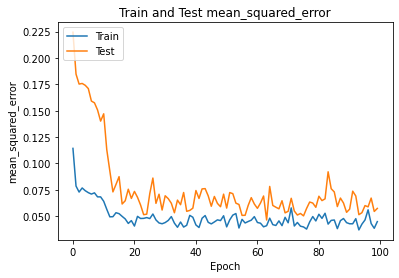

In [30]:
plt.plot(history.history[list(history.history.keys())[3]]) # mean_squared_error
plt.plot(history.history[list(history.history.keys())[1]]) # val_mean_squared_error
plt.title('Train and Test mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### **Plot training & validation loss values**

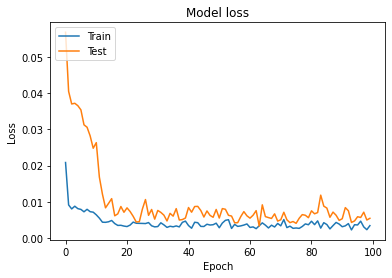

In [31]:
plt.plot(history.history[list(history.history.keys())[2]]) # loss
plt.plot(history.history[list(history.history.keys())[0]]) # val_loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### **Make predictions on the original scale of the data**

In [0]:
train_predict_pred = data_scaler.inverse_transform(model.predict(train_X))

In [35]:
print(type(train_predict_pred))
print(train_predict_pred.shape)
print(train_predict_pred[0:5])

<class 'numpy.ndarray'>
(84, 1)
[[133.30527]
 [135.02727]
 [140.62291]
 [138.41307]
 [135.89003]]


### **Prepare Y data to also be on the orginal scale for interpretability**

In [0]:
train_orig_data = data_scaler.inverse_transform([train_Y])

In [38]:
print(type(train_orig_data))
print(train_orig_data.shape)
print(train_orig_data[0:5])

<class 'numpy.ndarray'>
(1, 84)
[[117.99999916 131.99999879 129.00000163 120.99999632 135.00000368
  147.99999397 147.99999397 136.00000531 119.00000078 103.99999952
  117.99999916 115.00000199 125.99999674 140.99999801 135.00000368
  125.00000283 148.9999956  169.99999891 169.99999891 157.99999481
  133.00000042 114.00000036 139.99999638 145.00000452 149.99999723
  177.9999965  163.00000295 172.00000217 177.9999965  198.99999982
  198.99999982 184.00000627 162.00000133 146.00000615 165.9999924
  171.00000054 179.99999976 193.00000549 181.00000139 183.00000464
  217.99999988 230.00000398 241.99999264 209.00000066 191.00000223
  172.00000217 194.00000712 195.99999493 195.99999493 235.99999831
  234.99999668 229.00000235 242.99999427 263.99999759 272.00001061
  236.99999994 211.00000392 179.99999976 201.00000308 203.99999252
  187.99999735 234.99999668 226.9999991  233.99999506 263.99999759
  301.99999771 292.99999849 259.00000488 229.00000235 203.00000633
  229.00000235 241.99999264 232

### **Calculate RMSE**

In [0]:
rmse_train_score = math.sqrt(mean_squared_error(train_orig_data[0], train_predict_pred[:, 0]))
 

In [40]:
print("Training data score: %.2f RMSE" % rmse_train_score)

Training data score: 24.74 RMSE


## **Testing predicitons Make the predictions on the original scale of the testing data**

**Make predictions on the test data**

In [0]:
test_predict_pred = data_scaler.inverse_transform(model.predict(test_X))


**Prepare Y data to also be on the original scale for interpretability**

In [0]:
test_orig_data = data_scaler.inverse_transform([test_Y])


In [43]:
print(type(test_orig_data))
print(test_orig_data.shape)
print(test_orig_data[0:5])

<class 'numpy.ndarray'>
(1, 56)
[[313.00000018 317.99999288 373.999976   412.99999319 404.99998016
  355.00000681 306.00000422 270.99999355 306.00000422 315.00000344
  301.00001152 355.999993   348.00001085 355.00000681 421.9999924
  465.0000161  466.99998848 403.99999397 346.99999379 304.99998716
  335.99999132 339.99999783 317.99999288 362.00000277 348.00001085
  362.99998896 434.99999813 491.00002756 505.00001948 403.99999397
  359.00001333 310.00001073 337.00000838 359.99999952 342.00000109
  406.0000281  395.99998094 420.00002002 471.99998119 548.00004318
  559.00001477 462.99998197 407.00001429 362.00000277 404.99998016
  416.9999997  390.99998824 418.99997208 461.00000959 471.99998119
  535.00003745 622.00000929 606.00004499 507.99997805 461.00000959
  390.00000205]]


### **Calculate RMSE**

In [0]:
rmse_test_score = math.sqrt(mean_squared_error(test_orig_data[0], test_predict_pred[:, 0])) 

In [47]:
print("Test data score: %.2f RMSE" % rmse_test_score)


Test data score: 91.58 RMSE


### **Start with training predictions**

In [49]:
print(dataset.shape)

(144, 1)


In [0]:
train_predict_plot = np.empty_like(dataset)


In [58]:
print(train_predict_plot.shape)

(144, 1)


In [0]:
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict_pred) + window_size, :] = train_predict_pred


### **Starting testing predictions**

In [61]:
test_predict_plot = np.empty_like(dataset)
print(test_predict_plot.shape)

(144, 1)


In [0]:

test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_pred) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict_pred

### **Create the plot**

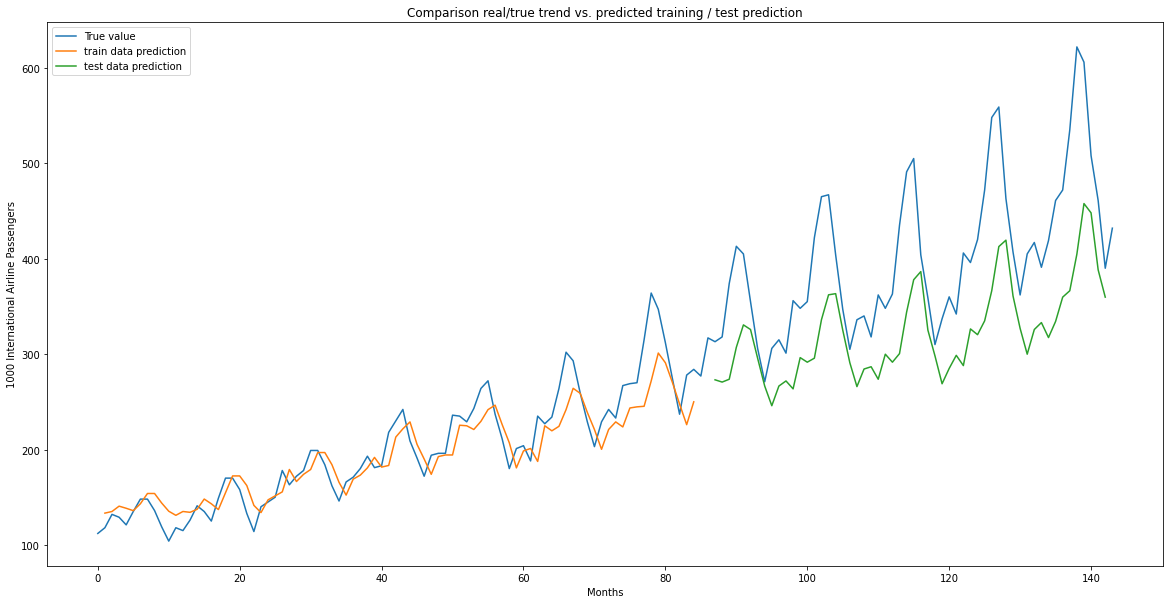

In [64]:
# Create the plot.
plt.figure(figsize = (20, 10))
plt.plot(data_scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "train data prediction")
plt.plot(test_predict_plot, label = "test data prediction")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison real/true trend vs. predicted training / test prediction")
plt.legend()
plt.show()

## **Evaluate this model**

**Obtain train score**

In [0]:
trainScore = model.evaluate(train_X, train_Y, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))


In [70]:
print(trainScore)

[0.0022810321922103562, 0.0361148500371547]


**Obtain testing score**

In [72]:
testScore = model.evaluate(test_X, test_Y, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Test Score: 0.03 MSE (0.18 RMSE)


In [73]:
print(testScore)

[0.03125503606029919, 0.15119620731898717]


In [0]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(test_X)
for u in range(len(test_Y)):
    pr = p[u][0]
    ratio.append((test_Y[u]/pr)-1)
    diff.append(abs(test_Y[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

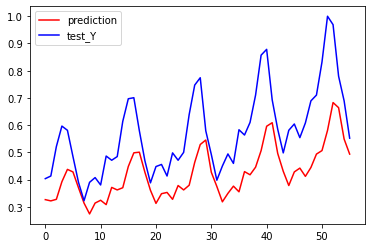

In [75]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(test_Y,color='blue', label='test_Y')
plt2.legend(loc='upper left')
plt2.show()